In [175]:
import numpy as np
import pandas as pd


In [176]:
import os 
os.chdir("C:\\Users\\linar\\Downloads\\DataSets-main\\DataSets-main")

In [177]:
import pandas as pd
city = pd.read_csv("City.csv")
cab = pd.read_csv("Cab_Data.csv")
transaction = pd.read_csv("Transaction_ID.csv")
customer = pd.read_csv("Customer_ID.csv")
display(cab.head())
display(transaction.head())
display(customer.head())
display(city.head())


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30,371,314
1,10000012,42375,Pink Cab,ATLANTA GA,29,359,335
2,10000013,42371,Pink Cab,ATLANTA GA,9,125,98
3,10000014,42376,Pink Cab,ATLANTA GA,33,377,352
4,10000015,42372,Pink Cab,ATLANTA GA,9,115,98


,Transaction ID,Customer ID,Payment_Mode
0,10016959,60000,Cash
1,10022694,60000,Cash
2,10036654,60000,Cash
3,10064210,60000,Cash
4,10226697,60000,Card


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
[cab['City'].unique() for i in cab.columns]

[array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON D

In [5]:
#data cleaning for city
def city_clean():
    city['City'] =city['City'].replace({'SILICON VALLEY': 'SILICON VALLEY CA', 'ORANGE COUNTY': 'ORANGE COUNTY CA ' })
    return city
city_clean()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY CA,"1,177,609","27,247"
5,ORANGE COUNTY CA,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
#for later use to see what is preffered method of payment
def check():
    transaction1 =transaction[transaction['Payment_Mode'] != 'Cash']
    a =transaction1[transaction1['Payment_Mode'] != 'Card']
    return a


In [7]:
#cleaning for transaction
def trans_clean(payment):
    if payment == 'card':
        trans = transaction[transaction['Payment_Mode'] == 'Card']
        return trans
    if payment == 'Cash':
        tra = transaction[transaction['Payment_Mode'] == 'Cash']
        
trans_clean('card')

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
4,10000015,27182,Card
6,10000017,33788,Card
7,10000018,34106,Card
...,...,...,...
440089,10440100,51852,Card
440092,10440103,53171,Card
440095,10440106,52175,Card
440096,10440107,52917,Card


In [8]:
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [9]:
from datetime import datetime, timedelta
# this cell will only run just once used to change the values of column km and convert them to miles although just approximated not exact

new = []
for i in cab['KM Travelled']:
    a = i / 1.6093
    new.append(a)

cab['KM Travelled'] = new
cab = cab.rename(columns={'KM Travelled': 'Miles Travelled'})

date2 = []
for i in cab['Date of Travel']:
    date = '1899-12-29'
    new_date = datetime.strptime(date, '%Y-%m-%d') + timedelta(days = i)
    date2.append(new_date)
cab['Date of Travel'] =date2
    
cab    

,Transaction ID,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,5.617349,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,20.611446,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,5.424719,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,2.982663,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,5.219661,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,17.243522,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,5.468216,146.19,114.0480


In [10]:
#cleaning for cab datset #convert the date column to a readable date
new = []
def cab_clean():
    cab['City'] =cab['City'].replace({'SILICON VALLEY': 'SILICON VALLEY CA', 'ORANGE COUNTY': 'ORANGE COUNTY CA ' })
    return cab
cab_clean()


,Transaction ID,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,5.617349,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,20.611446,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,5.424719,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,2.982663,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,5.219661,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,17.243522,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,5.468216,146.19,114.0480


In [11]:
#check
[cab_clean()['City'].unique() for i in cab_clean().columns]

[array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY CA ', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY CA',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY CA ', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY CA',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY CA ', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY CA',
        'TUCS

In [12]:
#as seen below it seems that transaction has no users from san fransisco that have made a transaction so far 
[city_clean()['City'].unique() for i in city_clean().columns]

[array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
        'SILICON VALLEY CA', 'ORANGE COUNTY CA ', 'SAN DIEGO CA',
        'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX',
        'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA',
        'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'],
       dtype=object),
 array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
        'SILICON VALLEY CA', 'ORANGE COUNTY CA ', 'SAN DIEGO CA',
        'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX',
        'SEATTLE WA', 'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA',
        'PITTSBURGH PA', 'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'],
       dtype=object),
 array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
        'SILICON VALLEY CA', 'ORANGE COUNTY CA ', 'SAN DIEGO CA',
        'PHOENIX AZ', 'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX',
        'SEATTLE WA', 'TUCSON AZ', 'SAN FRAN

In [13]:
#merging all data sets
def merge(type1):
    if type1 == 'outer': 
        first = pd.merge(customer, transaction, how='outer', on='Customer ID')
        second = pd.merge(first, cab, how='outer', on='Transaction ID')
        combined = pd.merge(second, city, how='outer', on='City')
        return combined
    if type1 == 'inner':
        first = pd.merge(customer, transaction, how='inner', on='Customer ID')
        second = pd.merge(first, cab_clean(), how='inner', on='Transaction ID')
        combined = pd.merge(second, city_clean(), how='inner', on='City')
        return combined
    if type1 == 'users':
        first = pd.merge(customer, transaction, how='inner', on='Customer ID')
        second = pd.merge(first, cab_clean(), how='inner', on='Transaction ID')
        combined = pd.merge(second, city_clean(), how='outer', on='City')
        return combined
cleaned = merge('users')


In [14]:
cleaned

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users
0,29290.0,Male,28.0,10813.0,10000011.0,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701"
1,29290.0,Male,28.0,10813.0,10351127.0,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701"
2,29290.0,Male,28.0,10813.0,10412921.0,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701"
3,27703.0,Male,27.0,9237.0,10000012.0,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701"
4,27703.0,Male,27.0,9237.0,10320494.0,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359388,51406.0,Female,29.0,6829.0,10319775.0,Cash,2018-04-12,Yellow Cab,WASHINGTON DC,2.218356,67.60,44.5536,"418,859","127,001"
359389,51406.0,Female,29.0,6829.0,10347676.0,Card,2018-07-05,Yellow Cab,WASHINGTON DC,14.577767,331.97,337.8240,"418,859","127,001"
359390,51406.0,Female,29.0,6829.0,10358624.0,Cash,2018-08-01,Yellow Cab,WASHINGTON DC,17.150314,358.23,364.3200,"418,859","127,001"
359391,51406.0,Female,29.0,6829.0,10370709.0,Card,2018-08-29,Yellow Cab,WASHINGTON DC,21.276331,453.11,427.3152,"418,859","127,001"


In [17]:
#used to seperate columns 
clean =merge('inner')
abrev = []
cty = []


for i in clean['City'].str.rsplit(' ', 1):
    abrev.append(i[0])
    cty.append(i[1])
        
clean['abrev'] = abrev    
clean['cty'] = cty


In [18]:
#check to make sure the above code split the values in column city correctly
clean[clean['abrev'] == 'NEW YORK']

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users,abrev,cty
167109,2416,Male,28,21399,10000139,Cash,2016-01-07,Pink Cab,NEW YORK NY,11.091779,242.90,198.1350,"8,405,837","302,149",NEW YORK,NY
167110,2416,Male,28,21399,10006684,Cash,2016-02-04,Yellow Cab,NEW YORK NY,21.338470,1099.35,482.1336,"8,405,837","302,149",NEW YORK,NY
167111,2416,Male,28,21399,10015798,Card,2016-03-12,Yellow Cab,NEW YORK NY,11.930653,559.30,264.9600,"8,405,837","302,149",NEW YORK,NY
167112,2416,Male,28,21399,10074689,Card,2016-09-07,Yellow Cab,NEW YORK NY,9.221401,322.28,179.8608,"8,405,837","302,149",NEW YORK,NY
167113,2416,Male,28,21399,10078883,Card,2016-09-17,Pink Cab,NEW YORK NY,23.041074,728.27,393.0480,"8,405,837","302,149",NEW YORK,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266989,677,Female,19,12958,10386767,Card,2018-10-04,Yellow Cab,NEW YORK NY,7.083825,315.37,147.7440,"8,405,837","302,149",NEW YORK,NY
266990,677,Female,19,12958,10422265,Card,2018-12-04,Yellow Cab,NEW YORK NY,10.998571,374.91,233.6400,"8,405,837","302,149",NEW YORK,NY
266991,677,Female,19,12958,10422684,Card,2018-12-07,Yellow Cab,NEW YORK NY,1.957373,74.05,40.4460,"8,405,837","302,149",NEW YORK,NY
266992,677,Female,19,12958,10435479,Card,2018-12-25,Yellow Cab,NEW YORK NY,24.600758,963.61,475.0800,"8,405,837","302,149",NEW YORK,NY


In [19]:
merge('users')

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users
0,29290.0,Male,28.0,10813.0,10000011.0,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701"
1,29290.0,Male,28.0,10813.0,10351127.0,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701"
2,29290.0,Male,28.0,10813.0,10412921.0,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701"
3,27703.0,Male,27.0,9237.0,10000012.0,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701"
4,27703.0,Male,27.0,9237.0,10320494.0,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359388,51406.0,Female,29.0,6829.0,10319775.0,Cash,2018-04-12,Yellow Cab,WASHINGTON DC,2.218356,67.60,44.5536,"418,859","127,001"
359389,51406.0,Female,29.0,6829.0,10347676.0,Card,2018-07-05,Yellow Cab,WASHINGTON DC,14.577767,331.97,337.8240,"418,859","127,001"
359390,51406.0,Female,29.0,6829.0,10358624.0,Cash,2018-08-01,Yellow Cab,WASHINGTON DC,17.150314,358.23,364.3200,"418,859","127,001"
359391,51406.0,Female,29.0,6829.0,10370709.0,Card,2018-08-29,Yellow Cab,WASHINGTON DC,21.276331,453.11,427.3152,"418,859","127,001"


In [20]:
[clean['cty'].unique() for i in clean.columns]

[array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'WA', 'DC'], dtype=object),
 array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', '', 'AZ',
        'PA', 'W

In [21]:
clean

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users,abrev,cty
0,29290,Male,28,10813,10000011,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701",ATLANTA,GA
1,29290,Male,28,10813,10351127,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701",ATLANTA,GA
2,29290,Male,28,10813,10412921,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701",ATLANTA,GA
3,27703,Male,27,9237,10000012,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701",ATLANTA,GA
4,27703,Male,27,9237,10320494,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701",ATLANTA,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-02,Yellow Cab,WASHINGTON DC,23.861306,668.93,525.3120,"418,859","127,001",WASHINGTON,DC
359388,51406,Female,29,6829,10319775,Cash,2018-04-12,Yellow Cab,WASHINGTON DC,2.218356,67.60,44.5536,"418,859","127,001",WASHINGTON,DC
359389,51406,Female,29,6829,10347676,Card,2018-07-05,Yellow Cab,WASHINGTON DC,14.577767,331.97,337.8240,"418,859","127,001",WASHINGTON,DC
359390,51406,Female,29,6829,10358624,Cash,2018-08-01,Yellow Cab,WASHINGTON DC,17.150314,358.23,364.3200,"418,859","127,001",WASHINGTON,DC


In [22]:
merge('outer').head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users
0,29290.0,Male,28.0,10813.0,10000011.0,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701"
1,29290.0,Male,28.0,10813.0,10351127.0,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701"
2,29290.0,Male,28.0,10813.0,10412921.0,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701"
3,27703.0,Male,27.0,9237.0,10000012.0,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701"
4,27703.0,Male,27.0,9237.0,10320494.0,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701"


In [23]:
clean.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users,abrev,cty
0,29290,Male,28,10813,10000011,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701",ATLANTA,GA
1,29290,Male,28,10813,10351127,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701",ATLANTA,GA
2,29290,Male,28,10813,10412921,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701",ATLANTA,GA
3,27703,Male,27,9237,10000012,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701",ATLANTA,GA
4,27703,Male,27,9237,10320494,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701",ATLANTA,GA


In [24]:
clean.to_csv('Cleaned_data.csv')

now that most of the data cleaning is done I want to visualize insights derived from this dataset for example does pink cab charge more then yellow cab?
or which is the most prominent user in terms of gender and whith which company users go with more often? Why is one cheaper then the other


<Figure size 640x480 with 0 Axes>

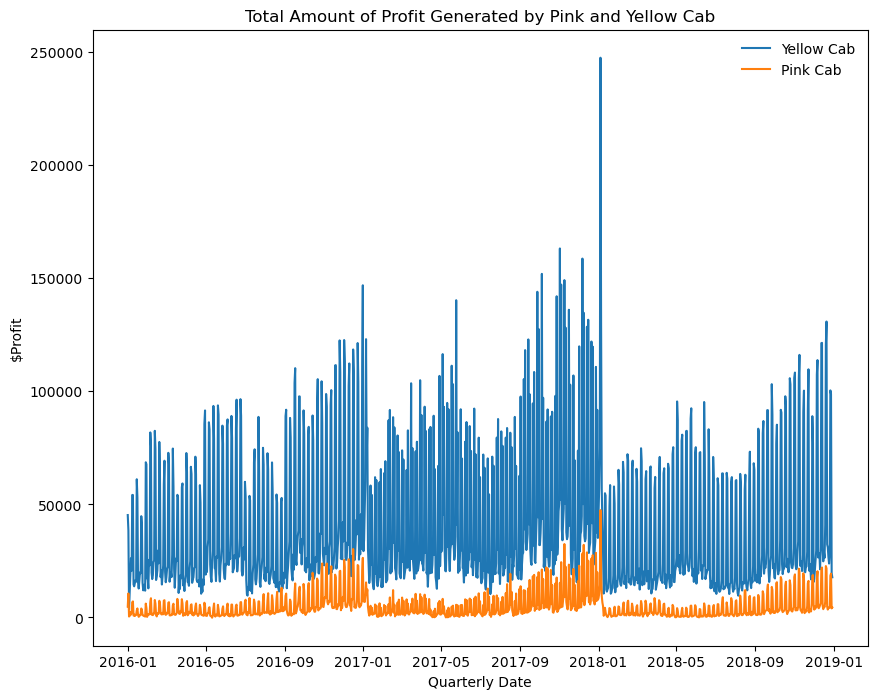

In [27]:
import matplotlib.pyplot as plt
import calendar 
#defining a function to return the amount of profit generated from both companies in total
def total_profit(a):
    clean['Total Profit'] = clean['Price Charged'] - clean['Cost of Trip']
    if a == '1':
        b = clean[clean['Company'] == 'Pink Cab']
        return b
    if a == '2':
        b = clean[clean['Company'] == 'Yellow Cab']
        return b 
def xy_label(b):
    if b == '1':
        c =total_profit('1')[['Total Profit', 'Date of Travel']].groupby(['Date of Travel'],as_index=False).sum()
        return c
    if b == '2':
        c =total_profit('2')[['Total Profit', 'Date of Travel']].groupby(['Date of Travel'],as_index=False).sum()
        return c 
    
plt.figure()
fig = plt.figure(figsize=(10,8))
plt.xlabel('Quarterly Date')
plt.ylabel('$Profit')
plt.title('Total Amount of Profit Generated by Pink and Yellow Cab')
plt.plot( xy_label('2')['Date of Travel'],xy_label('2')['Total Profit'])
plt.plot( xy_label('1')['Date of Travel'],xy_label('1')['Total Profit'])
plt.legend(['Yellow Cab', 'Pink Cab'], frameon= False)
#plt.yticks(total_profit()['Total Profit']

In [28]:
clean.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users,abrev,cty,Total Profit
0,29290,Male,28,10813,10000011,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701",ATLANTA,GA,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701",ATLANTA,GA,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701",ATLANTA,GA,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701",ATLANTA,GA,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701",ATLANTA,GA,253.9808


<Figure size 640x480 with 0 Axes>

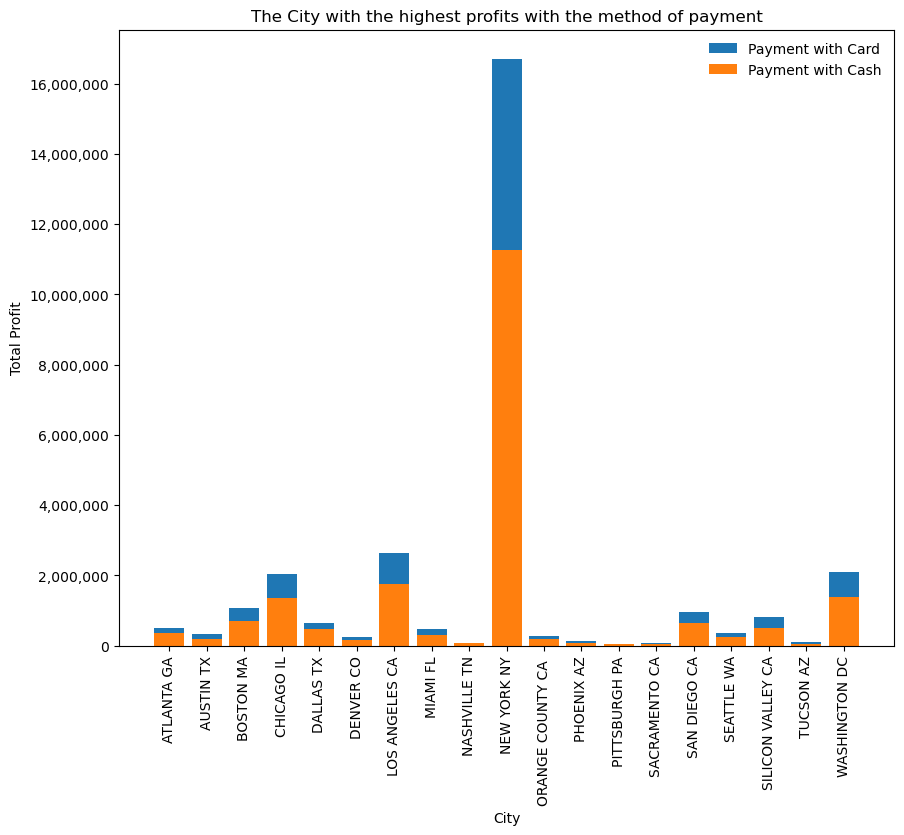

In [71]:
#now that we see which company has the highest profit lets see  which see what city has the highest amount of  revenue generated
def revenue(a):
    if a == '1':
        c = clean[clean['Payment_Mode'] == 'Card']
        return c
    if a == '2':
        c = clean[clean['Payment_Mode'] == 'Cash']
        return c
def xy_label2(a):
    if a == '1':
        c =revenue('1')[['City','Total Profit']].groupby('City', as_index =False).sum()
        pd.options.display.float_format = '{:.0f}'.format
        return c
    if a == '2':
        c = revenue('2')[['City','Total Profit']].groupby('City', as_index =False).sum()
        pd.options.display.float_format = '{:.0f}'.format
        return c 

plt.figure()
fig = plt.figure(figsize=(10,8))
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('The City with the highest profits with the method of payment')
plt.bar(xy_label2('1')['City'], xy_label2('1')['Total Profit'])
plt.bar(xy_label2('2')['City'], xy_label2('2')['Total Profit'])
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.legend(['Payment with Card', 'Payment with Cash'], frameon= False)


In [31]:
clean.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,Miles Travelled,Price Charged,Cost of Trip,Population,Users,abrev,cty,Total Profit
0,29290,Male,28,10813,10000011,Card,2016-01-07,Pink Cab,ATLANTA GA,18.921270,370.95,313.6350,"814,885","24,701",ATLANTA,GA,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-20,Yellow Cab,ATLANTA GA,16.274156,598.70,317.4228,"814,885","24,701",ATLANTA,GA,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-22,Yellow Cab,ATLANTA GA,26.440067,792.05,597.4020,"814,885","24,701",ATLANTA,GA,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-05,Pink Cab,ATLANTA GA,17.784130,358.52,334.8540,"814,885","24,701",ATLANTA,GA,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-20,Yellow Cab,ATLANTA GA,22.606102,721.10,467.1192,"814,885","24,701",ATLANTA,GA,253.9808


So no that we understand which city is the most prominent in profit sales lets understand the customer demographic a bit more for example male/female to user ratio, the amount of returning customers and which company retains these customer, what is the average age demographic and  income per month. (some of this may be shown using tableau)

In [97]:
#taking a look at the graph
customer_retention('1')

,City,Company,size
0,ATLANTA GA,Pink Cab,1322
1,AUSTIN TX,Pink Cab,1354
2,BOSTON MA,Pink Cab,2463
3,CHICAGO IL,Pink Cab,2859
4,DALLAS TX,Pink Cab,1118
5,DENVER CO,Pink Cab,1145
6,LOS ANGELES CA,Pink Cab,2996
7,MIAMI FL,Pink Cab,1480
8,NASHVILLE TN,Pink Cab,1356
9,NEW YORK NY,Pink Cab,2972


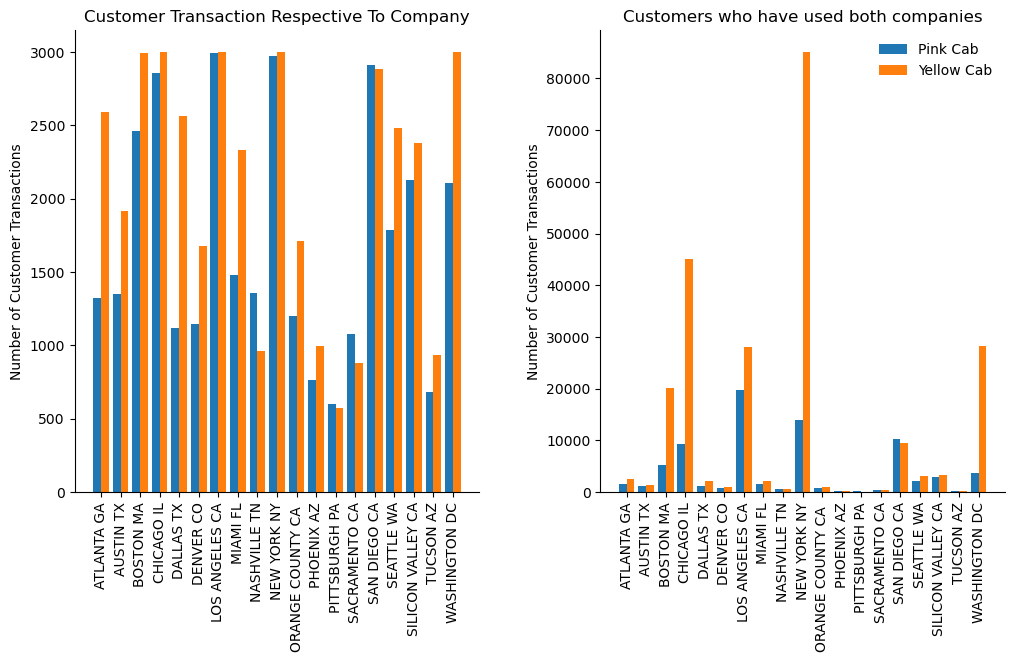

In [96]:
#for this graph we are going to take a look at the number or returning customers for example the amount of times a customer has used a different
#taxi but then ultimately switched to a more cheaper taxi service or vice a versa or whether or not they ended up just staying
#and being loyal to one brand
def customer_retention(a):
    c = clean.groupby(['Customer ID', 'Company', 'City'], as_index = False).size()
    if a == '1':
        b = c[c['Company'] == 'Pink Cab']
        return b.groupby(['City', 'Company'], as_index=False).size()
    if a == '2':
        b = c[c['Company'] == 'Yellow Cab']
        return b.groupby(['City', 'Company'], as_index=False).size()
    if a == '3':
        b = c[c['Company'] == 'Pink Cab']
        return b
    if a == '4':
        b = c[c['Company'] == 'Yellow Cab']
        return b
def Customer_Change():
    customer_change = pd.merge(customer_retention('3'),customer_retention('4'), how='inner', on='Customer ID')
    return customer_change.groupby(['City_x', 'City_y'],as_index=False).sum()        

# Create a figure with larger size and two subplots
fig = plt.figure(figsize=(12, 6))

# Create the first subplot and plot the bar chart
ax1 = fig.add_subplot(1, 2, 1)

# Get the x-positions for the bars
x1 = np.arange(len(customer_retention('1')['City']))
x2 = x1 + .4

ax1.bar(x1,customer_retention('1')['size'], width=0.4, label='Bar 1')
ax1.bar(x2,customer_retention('2')['size'], width=.4, label='bar 2')
ax1.set_title('Customer Transaction Respective To Company')
ax1.set_xticks( x1 +.2)
ax1.set_xticklabels(customer_retention('1')['City'], rotation=90)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Number of Customer Transactions')
#ax1.legend(['Pink Cab', 'Yellow Cab'])


# Create the second subplot and plot the bar chart
ax2 = fig.add_subplot(1, 2, 2)

# Get the x-positions for the bars
x1 = np.arange(len(Customer_Change()['City_x']))
x2 = x1 + .4

ax2.bar(x1,Customer_Change()['size_x'],width=0.4)
ax2.bar(x2,Customer_Change()['size_y'], width=0.4)
ax2.set_title('Customers who have used both companies')
ax2.set_xticks( x1 +.2)
ax2.set_xticklabels(Customer_Change()['City_x'], rotation=90)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(['Pink Cab', 'Yellow Cab'], frameon=False)
ax2.set_ylabel('Number of Customer Transactions')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

On the left side we see that the amount of customers that have used one of the taxi cabs in a city over the other. In this visualization we can see that things for the most part are fairly even both Pink Cab and Yello Cab have a good market share. However this is not a good visualization to see which is the more prefered company because we are only counting the customer transactions respective to each company in total not considering the fact some consumers will be choose Pink Cab solely because it is cheaper or maybe brand loyalty plays a factor

To get a better idea of which company actually is able to win over customers from the other lets take a look at the the graph on the right side that shows the customers who have used both companies and which company dominates the transactions of each customer. We can clearly see that Yellow Cab has a considerable amount of those customer transactions in about 5 cities and the rest is pretty even for the most part, why? The answer is not clear there isnt a enough data to conclude why Yellow Cab dominates some cities over the others it could be because those cities are fairly big and the demand of Taxi cabs is bigger and because the mean income in those cities is lager then that might play an affect. Also could be that Yellow Cab has better hospitality and a more luxurious feel to it. However Like I said this just inferences and we cannot correctly deduce more unless we had more data about the competition.

Now lets take a look at the customer demographic and what exactly we can deduce from it and how we can tailor to there needs in this graph we are going to take a look at the percentage of male and female users, what is the average age, and how much do they make monthly

In [276]:
#this function is used for the graphs below it was a little too extensive so i decided to move it up a cell
def customer_demographic(a):
    male= 0
    female = 0
    if a == 'gender':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False).size()
        for i in c['Gender']:
            if i == 'Male':
                male +=1
            if i == 'Female':
                female +=1
        return male, female
    if a == 'male_age_mean':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
        male_mean_age =c.groupby('Gender', as_index=False).mean()['Age'][1]
        return male_mean_age
    if a == 'female_age_mean':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
        female_mean_age =c.groupby('Gender', as_index=False).mean()['Age'][0]
        return female_mean_age
    if a == 'len':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
        return len(c['Gender'])
    if a == 'male_age_stdev':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
        male_std_age =c.groupby('Gender', as_index=False).std()['Age'][1]
        return male_std_age
    if a == 'female_age_stdev':
        c = clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
        female_std_age =c.groupby('Gender', as_index=False).std()['Age'][0]
        return female_std_age
    if a == 'regular':
        return clean.groupby(['Customer ID', 'Gender'], as_index=False)['Age'].first()
    if a == 'income':
        

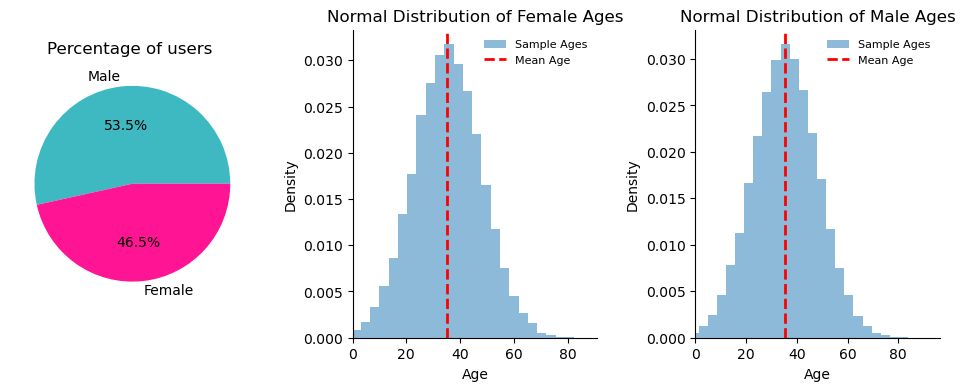

In [302]:

#variables for the histogram plots
sample_female_ages = np.random.normal(customer_demographic('female_age_mean'), customer_demographic('female_age_stdev'), customer_demographic('len'))
sample_male_ages = np.random.normal(customer_demographic('male_age_mean'), customer_demographic('male_age_stdev'), customer_demographic('len'))
x_lower_bound = 0
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
#this plot will show the general customer gender demographic to show what is the percentage of gender users 
axes[0].set_title('Percentage of users ')
axes[0].pie(customer_demographic('gender'), labels = ['Male', 'Female'], colors=['#3eb9c1', '#FF1493'],  autopct='%1.1f%%')
# thi plot will show the distribution and average age of female 
axes[1].hist(sample_female_ages, bins=30, density=True, alpha=0.5, label='Sample Ages')
axes[1].axvline(customer_demographic('female_age_mean'), color='r', linestyle='--', linewidth=2, label='Mean Age')
axes[1].set_xlabel('Age')
# Set the x-axis label
axes[1].set_xlabel('Age')

# Set the y-axis label
axes[1].set_ylabel('Density')

# Set the title
axes[1].set_title('Normal Distribution of Female Ages')

# Add a legend
axes[1].legend(prop={'size': 8}, frameon=False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlim(x_lower_bound, None)

# this plot will show thedistribution and average age of and males
axes[2].hist(sample_male_ages, bins=30, density=True, alpha=0.5, label='Sample Ages')
axes[2].axvline(customer_demographic('male_age_mean'), color='r', linestyle='--', linewidth=2, label='Mean Age')
axes[2].set_xlabel('Age')
# Set the x-axis label
axes[2].set_xlabel('Age')

# Set the y-axis label
axes[2].set_ylabel('Density')

# Set the title
axes[2].set_title('Normal Distribution of Male Ages')

# Add a legend
axes[2].legend(prop={'size': 8}, frameon=False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].set_xlim(x_lower_bound, None)

plt.subplots_adjust(wspace=0.4)

In the above graphs the graph on the rights show the percentage of users that are male and female, the graphs in the middle and right show the normal distribution of both male and female user to get an idea of what the target market is like

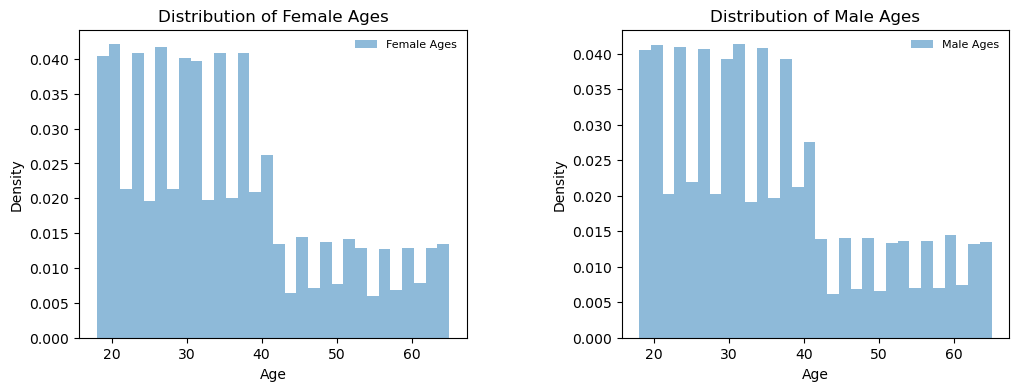

In [277]:
import matplotlib.pyplot as plt
import pandas as pd



# Get the DataFrame for female and male ages
female_ages = customer_demographic('regular').loc[customer_demographic('regular')['Gender'] == 'Female', 'Age']
male_ages = customer_demographic('regular').loc[customer_demographic('regular')['Gender'] == 'Male', 'Age']

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histogram for female ages
axes[0].hist(female_ages, bins=30, density=True, alpha=0.5, label='Female Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Female Ages')

# Plot the histogram for male ages
axes[1].hist(male_ages, bins=30, density=True, alpha=0.5, label='Male Ages')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Male Ages')

# Add a legend
axes[0].legend(prop={'size': 8}, frameon=False)
axes[1].legend(prop={'size': 8}, frameon=False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


In the above graphs we can see the actual distribution of female and male ages within our sample size of those that have actually made a transaction. We can use this to compare with the normal distribution and settle with a target demographic of about ages 20-30

In [339]:
#lets look at the income of those that use each company and all those in between 
def max_income(a):
    if a == 'female':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c = income[income['Gender'] == 'Female'].groupby('City', as_index=False).max()
        return c
    if a == 'male':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c = income[income['Gender'] == 'Male'].groupby('City').max()
        return c
    
def min_income(a):
    if a == 'female':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c =income[income['Gender'] == 'Female'].groupby('City').min()
        return c
    if a == 'male':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c =income[income['Gender'] == 'Male'].groupby('City').min()
        return c
def avg_income(a):
    if a == 'female':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c =income[income['Gender'] == 'Female'].groupby('City').mean()
        return c
    if a == 'male':
        income = clean.groupby(['Customer ID', 'Gender', 'City','Income (USD/Month)'], as_index=False).size()
        c =income[income['Gender'] == 'Male'].groupby('City').mean()
        return c

<Figure size 640x480 with 0 Axes>

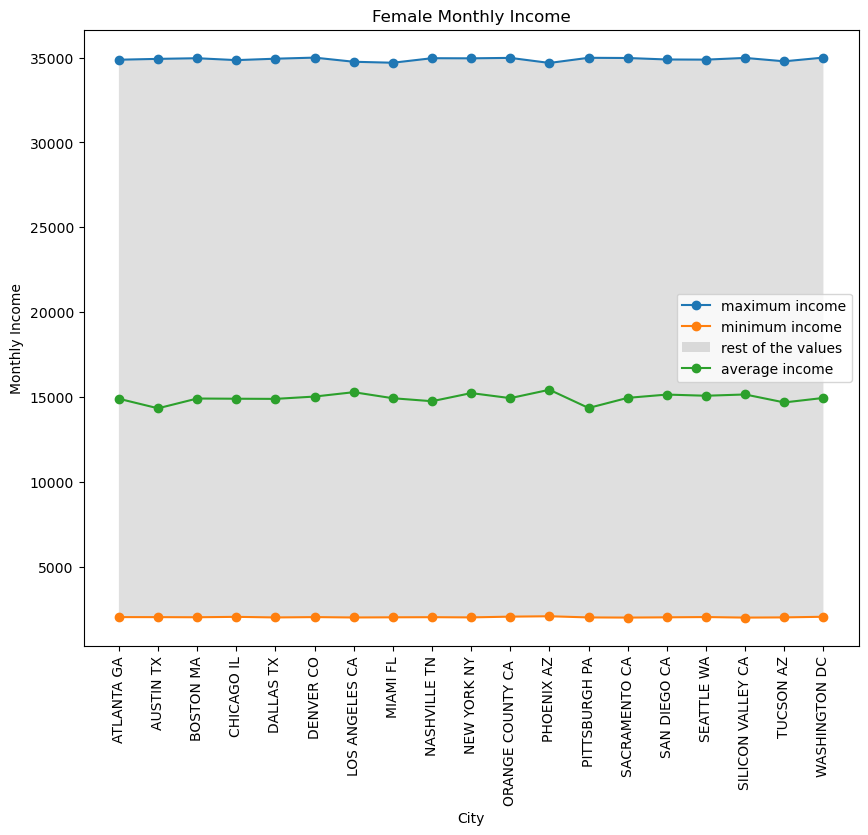

In [357]:
plt.figure()
fig = plt.figure(figsize=(10,8))
#labels
plt.xlabel('City')
plt.ylabel('Monthly Income')
plt.title('Female Monthly Income')

#plot to show the incomes of female users from highest to lowest all those in between and the average income monthly
plt.plot(max_income('female')['Income (USD/Month)'], '-o',min_income('female')['Income (USD/Month)'], '-o')
plt.gca().fill_between(range(len(max_income('female')['Income (USD/Month)'])), 
                       max_income('female')['Income (USD/Month)'], min_income('female')['Income (USD/Month)'], 
                       facecolor='grey', 
                       alpha=0.25)
plt.plot(avg_income('female')['Income (USD/Month)'], '-o')

#rotate the values of the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
#legend    
plt.legend(['maximum income', 'minimum income','rest of the values', 'average income'])

<Figure size 640x480 with 0 Axes>

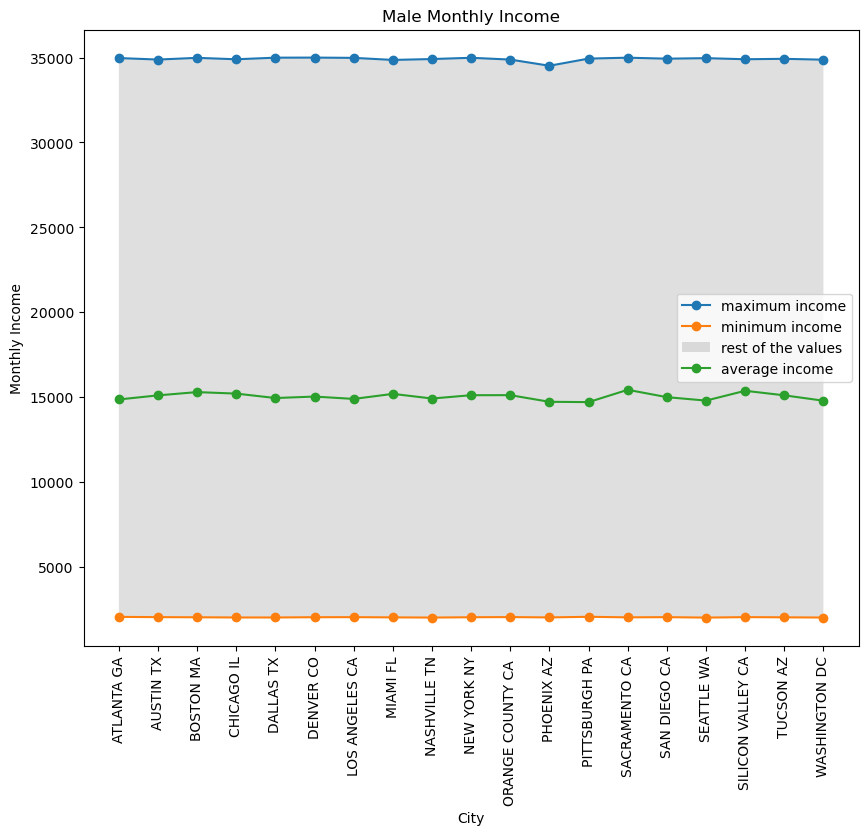

In [358]:

plt.figure()
fig = plt.figure(figsize=(10,8))
plt.xlabel('City')
plt.ylabel('Monthly Income')
plt.title('Male Monthly Income')

#plot to show the incomes of male users from highest to lowest all those in between and the average income monthly
plt.plot(max_income('male')['Income (USD/Month)'], '-o',min_income('male')['Income (USD/Month)'], '-o')
plt.gca().fill_between(range(len(max_income('male')['Income (USD/Month)'])), 
                       max_income('male')['Income (USD/Month)'], min_income('male')['Income (USD/Month)'], 
                       facecolor='grey', 
                       alpha=0.25)
plt.plot(avg_income('male')['Income (USD/Month)'], '-o')

#rotate the values of the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
#legend
plt.legend(['maximum income', 'minimum income','rest of the values', 'average income'])

The above graoh show both the male and female income monthly the maximimum, minimum, and average incomes in each city.

Finallly lets introduce the outliers and data we have no information for reference and maybe even the possibility of a 
break out market, more data will need to be collected however.


In [354]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [356]:
#just to see a quick summary of the table with no values san francisco
noValue = merge('users')
noValue[noValue['City'] == 'SAN FRANCISCO CA' ]

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
359392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN FRANCISCO CA,NaN,NaN,NaN,"629,591","213,609"


We are calling this data just to see how San Francisco is lacking data and how maybe it could be a potential breakout market 
for investment if more data was acquired.

# summary of the data and what to do moving forward
In conclusion after analyzing the data set it is apparent that the target demographic should be male and female users between the ages of 20 and 50. The Taxi cab fair service could also slide into the middle class of the taxi cab companies because people dont mind paying high amounts for yellow cab and infact most prefer them instead of pink cab based on the fact that they have more users. Offering a middle ground price charged could give the new taxi cab service an incredible amount of market share and help reach breakeven faster. My suggestion is to make it so that users with an average income of around 1300 monthly would suffice. The method of payment should definitely accomodate those that pay with card so having technology that could accept such payments because card is such a prominent method of payment and preferred over cash even in most cities. As for the city market to enter, if the taxi cab business model pursues a lower price cost then yellow cab and is able to offer what they offer and still differentiate the taxi cab company identity/brand then I suggest entering the Boston,Chicago, Los Angeles, New York, and Washington cities and trying to take away customers from Yellow Cab. However no matter what market we enter it is still risky because there are still unanswered questions about customer behavior. So the preffered state would be to obtain more data on this. It is a good idea to also look into the San Francisco market as well considering there are a considerable amount of users it could be a potential new market that has been left rather untouched.
